In [131]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex, HTML, Math, display

# PW4 - Klassische Mechanik

## Gleichmäßig beschleunigte Bewegung

### Versuchsaufbau und Durchführung

Auf dem waagerecht ausgerichteten Luftkissentisch wird ein Gleiter mit Filzring mit der Masse $m_1$ platziert. An diesem wird mit einem Faden eine kleine Masse $m_2$ angebracht, so dass sie über den Tisch nach unten hängt. Nun wird die Aufnahme gestartet und der Gleiter losgelassen. 

Aus der Aufnahme wird ein Bewegungsdiagramm $x(t)$ erstellt und ein quadratischer Fit eingezeichnet um $a$, $v_0$, $x_0$ zu ermitteln. Weiters wird aus den Daten die Kraft, die das System beschleunigt bestimmt und mit der theoretisch wirkenden Kraft verglichen, unter der Annahme, dass sich der Gleiter komplett reibungsfrei bewegt. Aus der Differenz wird zuletzt der Gleitreibungskoeffient $\mu$ bestimmt.

### Wichtige Formeln

gleichförmig beschleunigte Bewegung:

* Momentangeschwindigkeit: $v(t) = at + v_0$
* Bahnkurve: $x(t) = \frac{a}{2}t^2 + v_0 t + x_0$ 
* Kraft auf einen Massepunktt: $\vec{F} = m \vec{a}$ 

gleichförmige Kreisbewegung:

* Winkelgeschwindigkeit: $\omega = \lim_{\Delta t \to 0} \frac{\Delta \varphi}{\Delta t} = \frac{\mathrm{d}\varphi}{\mathrm{d}t} = \dot{\varphi}$
* Bahngeschwindigkeit: $\vec{v} = \frac{\mathrm{d}\vec{r}}{\mathrm{d}t} = \vec{\omega} \times \vec{r}$ 

Reibung:

* Gleireibungskraft: $F_{\mathrm{GR}} = \mu_{\mathrm{G}} F_{\mathrm{N}}$

Mehrteilchensysteme:

* Ortsvektor des Schwerpunkts: $\vec{R} = \frac{\sum_i \vec{r}_i m_i}{\sum_i m_i}$


<IPython.core.display.Latex object>

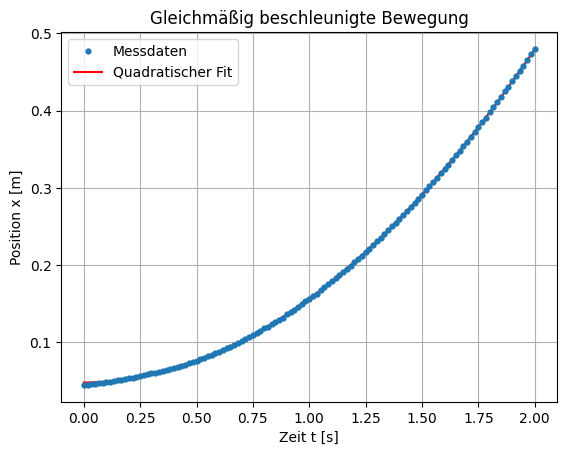

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [132]:
###  gleichmäßig beschleunigte bewegung

# robust file parsing: try common separators and handle decimal commas
try:
	df = pd.read_csv("beschleunigt3.txt", sep='\t', decimal=',', engine='python')
except Exception:
	df = pd.read_csv("beschleunigt3.txt", sep=None, decimal=',', engine='python')

# If header got read as a data row (common when separators are different), promote first row to header
if "t" not in df.columns:
	# try to use the first row as header if it contains the expected names
	first_row = df.iloc[0].astype(str).str.strip().tolist()
	if "t" in first_row or "x" in first_row:
		df.columns = first_row
		df = df[1:].reset_index(drop=True)

# ensure columns are present
if "t" not in df.columns or "x" not in df.columns:
	raise KeyError("Die Datei 'beschleunigt3.txt' konnte nicht korrekt eingelesen werden. Erwartete Spalten 't' und 'x' fehlen.")

# convert possible comma decimals and non-numeric entries to floats
df["t"] = pd.to_numeric(df["t"].astype(str).str.replace(",", ".").str.strip(), errors="coerce")
df["x"] = pd.to_numeric(df["x"].astype(str).str.replace(",", ".").str.strip(), errors="coerce")

# drop rows with missing t or y
df = df.dropna(subset=["t", "x"]).reset_index(drop=True)

t = df["t"].to_numpy(dtype=float)
x = df["x"].to_numpy(dtype=float)

# fit a quadratic: y = (a/2) t^2 + v0 t + x0  => poly coeffs correspond to [A, B, C] where A = a/2
coeffs = np.polyfit(t, x, 2)
a = 2 * coeffs[0]
v0 = coeffs[1]
x0 = coeffs[2]

display(Latex((rf"$$a = {a:.2f}\ \mathrm{{m/s^2}} \quad v_0 = {v0:.2f}\ \mathrm{{m/s}} \quad x_0 = {x0:.2f}\ \mathrm{{m}}$$"))) #errchnete werte von oben werden ausgegeben 

x_fit = np.polyval(coeffs, t) #fit 

#plot
plt.figure()
plt.plot(t, x, 'o', markersize=3.5, label="Messdaten", zorder=10)
plt.plot(t, x_fit, color="red", label="Quadratischer Fit")
plt.xlabel("Zeit t [s]")
plt.ylabel("Position x [m]")
plt.title("Gleichmäßig beschleunigte Bewegung")
plt.legend()
plt.grid(True)
plt.show()

#Daten für die Auswertung der Reibungskraft
m1 = 1
m2 = 0.02
F1 = (m1 + m2) * a #a = Beschleunigung aus der Bewegung ermittelt
F2 = m2 * 9.81 #Gravitationskraft
display(Latex((rf"$$F_1 = {F1:.2f}\ \mathrm{{N}} \quad F_2 = {F2:.2f}\ \mathrm{{N}}$$")))
Fr = F2 - F1
Reibungskoeffizient = Fr / (m1 * 9.81)
display(Latex((rf"$$\mu = {Reibungskoeffizient:.4f}$$")))


### Diskussion

Es ist sehr schön erkennbar, dass quadratischer Zusammenhang besteht. 
Bei unserem Versuch kommen wir auf einen negativen Gleitreibungskoeffizient. Das könnte daran liegen, dass der Tisch nicht komplett gerade war und/oder ein leichtet Impuls beim loslassen des Gleiters mitgegeben wurde. Laut unserem Daten wäre die Kraft, die den Gleiter beschleunigt größer als die Gravitationskraft, was nicht sein kann, da das Gewicht nur mir der Gravitationskraft richtung Boden gezogen wird. 

## Kräftefreie Bewegung

### Versuchsaufbau und Durchführung

Bei diesem Versuch wird ein Gleiter am Rand mit einem Punkt markiert und in eine Bewegung mit Rotation versetzt, um die Bewegung von Schwerpunkt und Peripheriepunkt zu analysieren.

Dargestellt werden jeweils die Position und Geschwindigkeit von Schwer- und Peripheriepunkt in einem (X,Y)-Diagramm. und die Winkelgeschwindigkeit $\omega$ abgeschätzt.

### Wichtige Formeln und Zusammenhänge:

* Geschwindigkeit eines Punktes am starren Körper: $\vec{v} = \vec{v}_s + \vec{\omega} \times \vec{r}$
ist eine Überlagerung der Schwerpunktsbewegung mit der Geschwindigkeit und der Rotation mit der Bahngeschwindigkeit


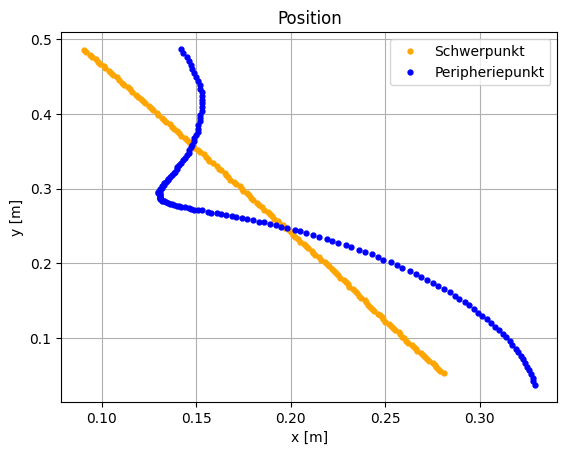

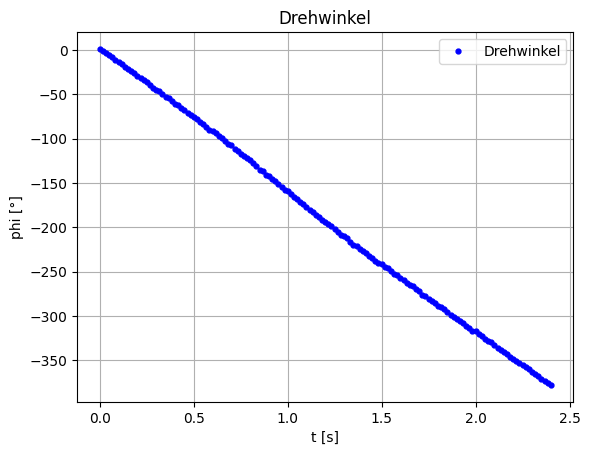

<IPython.core.display.Latex object>

In [133]:
### Position SChwer und Peripheriepunkt

df = pd.read_csv("kraftfrei.txt", sep='\t', decimal=',', engine='python')
t = df["t"].to_numpy() 
xs = df["xa"].to_numpy() # jeweils in blau: Name der Vraiable für Python, rot: Name der Variable in Tracker
ys = df["ya"].to_numpy()
xp = df["xb"].to_numpy()
yp = df["yb"].to_numpy()

x = xp - xs
y = yp - ys

phi = np.unwrap(np.arctan2(y,x))*180/np.pi



plt.figure()
plt.plot(xs, ys, 'o', markersize=3.5, label="Schwerpunkt", color="orange")
plt.plot(xp, yp, 'o', markersize=3.5, label="Peripheriepunkt", color="blue") 
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("Position")
plt.legend()
plt.grid(True)
plt.show()



#phi
plt.figure()
plt.plot(t, phi, 'o', markersize=3.5, label="Drehwinkel", color="blue")
plt.xlabel("t [s]")
plt.ylabel("phi [°]")
plt.title("Drehwinkel")
plt.legend()
plt.grid(True)
plt.show()



#omega
display(Latex((rf"$$\omega \approx {-160}\ \mathrm{{°/s}} \approx {-3}\ \mathrm{{rad/s}} $$")))

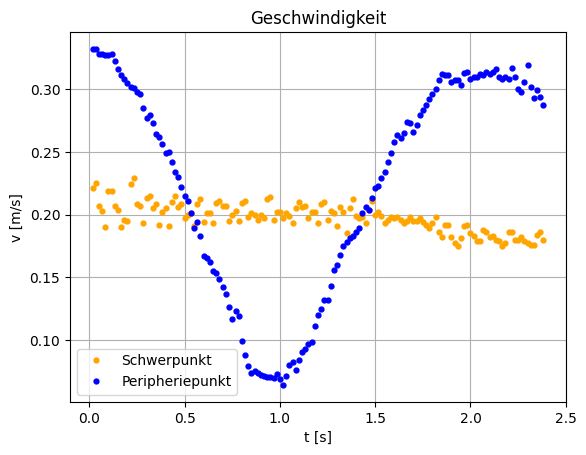

In [134]:
### geschwindigkeiten

df = pd.read_csv("kraftfrei3.txt", sep='\t', decimal=',', engine='python')
t = df["t"].to_numpy()
vs = df["v"].to_numpy()
vp = df["w"].to_numpy()

plt.figure()
plt.plot(t, vs, 'o', markersize=3.5, label="Schwerpunkt", color="orange")
plt.plot(t, vp, 'o', markersize=3.5, label="Peripheriepunkt", color="blue")
plt.xlabel("t [s]")
plt.ylabel("v [m/s]")
plt.title("Geschwindigkeit")
plt.legend()
plt.grid(True)
plt.show()

### Diskussion

Aus den Diagrammen ist eine gradlinige Bewegung und annähernd konstante Geschwindigkeit des Schwerpunkts erkennbar. Der Peripheriepunkt rotiert mit einer abgeschätzen Winkelgeschwindigkeit von -160 rad/s rundherum. Er bewegt sich also im Uhrzeigersinn.

## Elastischer Stoß

### Versuchsaufbau und Durchführung

Auf zwei Gleitern werden Federringe angebracht und einer wird mit einem zusätzlichen Gewicht versehen. Die jeweiligen Massen werden bestimmt, bevor die Gleiter aufeinander zubewegt werden und ein Stoß aufgezeichnet wird. 

Aus den aufgezeichneten Daten werden die Bahnen der beiden Gleiter und des Schwerpunkts in einem gemeinsamen (X,Y)-Diagramm dargestellt. Weiters werden Gesamtimpuls und -energie vor und nach dem Stoß ermittelt.

### Wichtige Formeln und Zusammenhänge:

* Impulserhaltung: Der Gesamtimpuls des Systems ist zeitlich konstant: 
$m_1 \vec{v}_1 + m_2 \vec{v}_2 = m_1 \vec{w}_1 + m_2 \vec{w}_2$

* Energieerhaltung: Die Gesamtenergie bleibt erhalten, es wird keine kinetische Energie in andere Energieformen umgewandelt:
$\frac{m_1 \vec{v}_1^{\,2}}{2} + \frac{m_2 \vec{v}_2^{\,2}}{2} = \frac{m_1 \vec{w}_1^{\,2}}{2} + \frac{m_2 \vec{w}_2^{\,2}}{2}$

* Schwerpunktsatz: Der Schwerpunkt eines abgeschlossenen Systems bewegt sich geradlinig und unabhängig von der Wechselwirkung und der Bewegung der einzelnen Körper.


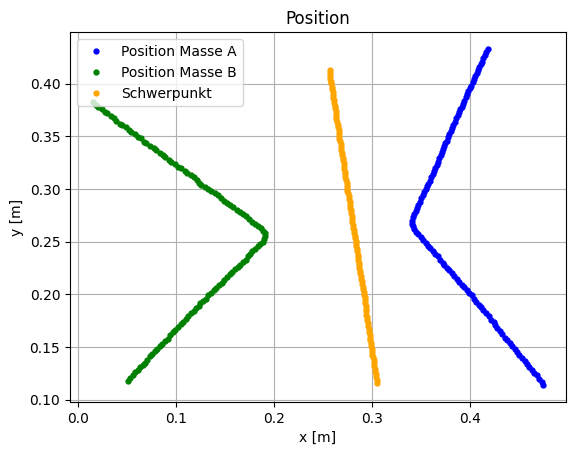

In [135]:
### bahn

df = pd.read_csv("impuls.txt", sep='\t', decimal=',', engine='python')
t = df["t"].to_numpy()
xa = df["xa"].to_numpy()
ya = df["ya"].to_numpy()
xb = df["xb"].to_numpy()
yb = df["yb"].to_numpy()

ma = 1.5
mb = 1

xs = ((ma * xa) + (mb * xb))/(ma + mb)
ys = ((ma * ya) + (mb * yb))/(ma + mb)

plt.figure()
plt.plot(xa, ya, 'o', markersize=3.5, label="Position Masse A", color="blue")
plt.plot(xb, yb, 'o', markersize=3.5, label="Position Masse B", color="green")
plt.plot(xs, ys, 'o', markersize=3.5, label="Schwerpunkt", color="orange")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("Position")
plt.legend()
plt.grid(True)
plt.show()

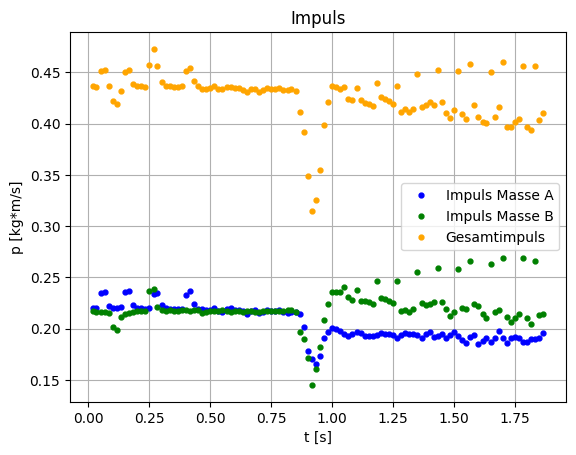

In [136]:
### impuls

df = pd.read_csv("impuls.txt", sep='\t', decimal=',', engine='python')
t = df["t"].to_numpy()
pa = df["pa"].to_numpy()
pb = df["pb"].to_numpy()


p = pa + pb # gesamtimpuls

plt.figure()
plt.plot(t, pa, 'o', markersize=3.5, label="Impuls Masse A", color="blue")
plt.plot(t, pb, 'o', markersize=3.5, label="Impuls Masse B", color="green")
plt.plot(t, p, 'o', markersize=3.5, label="Gesamtimpuls", color="orange") # + weitere zeilen mit den jeweils einzelnen impulsen?
plt.xlabel("t [s]")
plt.ylabel("p [kg*m/s]")
plt.title("Impuls")
plt.legend()
plt.grid(True)
plt.show()

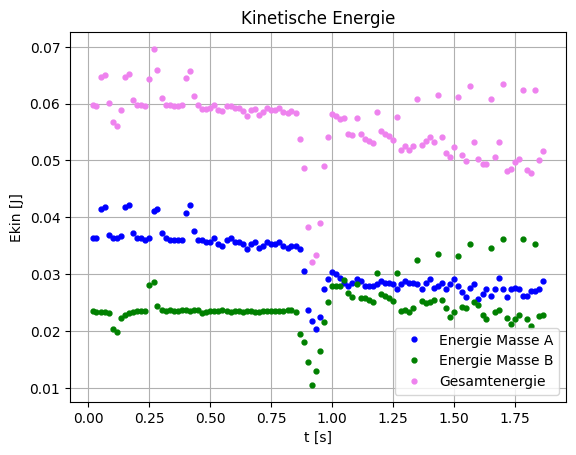

In [137]:
## energie

df = pd.read_csv("impuls.txt", sep='\t', decimal=',', engine='python')
t = df["t"].to_numpy()
va = df["va"].to_numpy()
vb = df["vb"].to_numpy()
ma = 1.5
mb = 1

Ea = 0.5 * ma * va**2
Eb = 0.5 * mb * vb**2
E = Ea + Eb

plt.figure()
plt.plot(t, Ea, 'o', markersize=3.5, label="Energie Masse A", color="blue")
plt.plot(t, Eb, 'o', markersize=3.5, label="Energie Masse B", color="green")
plt.plot(t, E, 'o', markersize=3.5, label="Gesamtenergie", color="violet") # + weitere zeilen mit den jeweils einzelnen energien?
plt.xlabel("t [s]")
plt.ylabel("Ekin [J]")
plt.title("Kinetische Energie")
plt.legend()
plt.grid(True)
plt.show()





### Diskussion

Aus der Bahnkurve des Stoßes, ist zu erkennen, dass die Masse A die schwerere war, da sie weniger abgelenkt wird. 
Außerdem ist erkennbar, dass Gesamtimpuls und -energie vor und nach dem Stoß gleich sind. Nach dem Stoß, tritt bei Masse B und im Gesamtimpuls eine kleine Streuung auf, die höchstwahrscheinlich aus Fehlern beim tracking mit der Software stammt. Diese Streuung ist aber in den Impuls- und Energiediagrammen konsistent, weswegen wir sie vernachlässigen. 